In [ ]:
!pip install auto-sklearn
!pip install scikit-learn
!pip install sweetviz
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

**Leitura dos dados e visualização de suas tabelas para eu eu possa saber qual será a variável alvo que no caso como quero prever a qualidade do vinho, será a 'quality'.**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/winequality-red.csv')
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Uma maneira rápida e eficiente de entender o contexto dos dados é por meio da biblioteca Sweetviz, que fornece uma análise descritiva detalhada. Com ela, é possível ter uma visão geral das distribuições, estatísticas básicas, valores nulos e correlações entre as variáveis. Essas informações ajudam a identificar possíveis problemas nos dados e orientam na escolha dos métodos de pré-processamento e análise mais adequados.**

                                             |          | [  0%]   00:00 -> (? left)


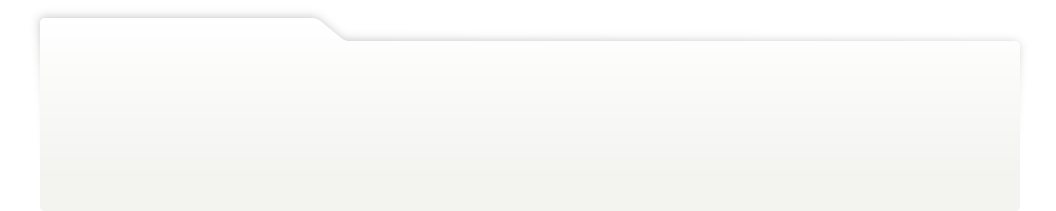
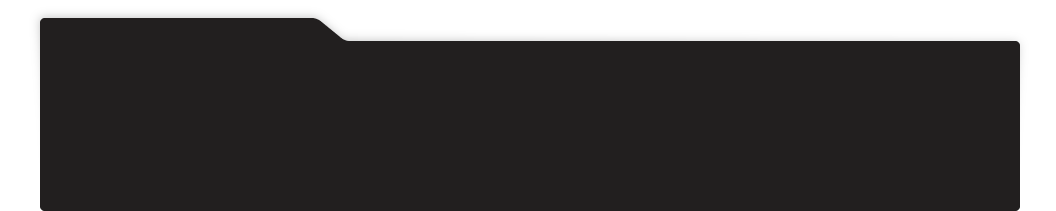
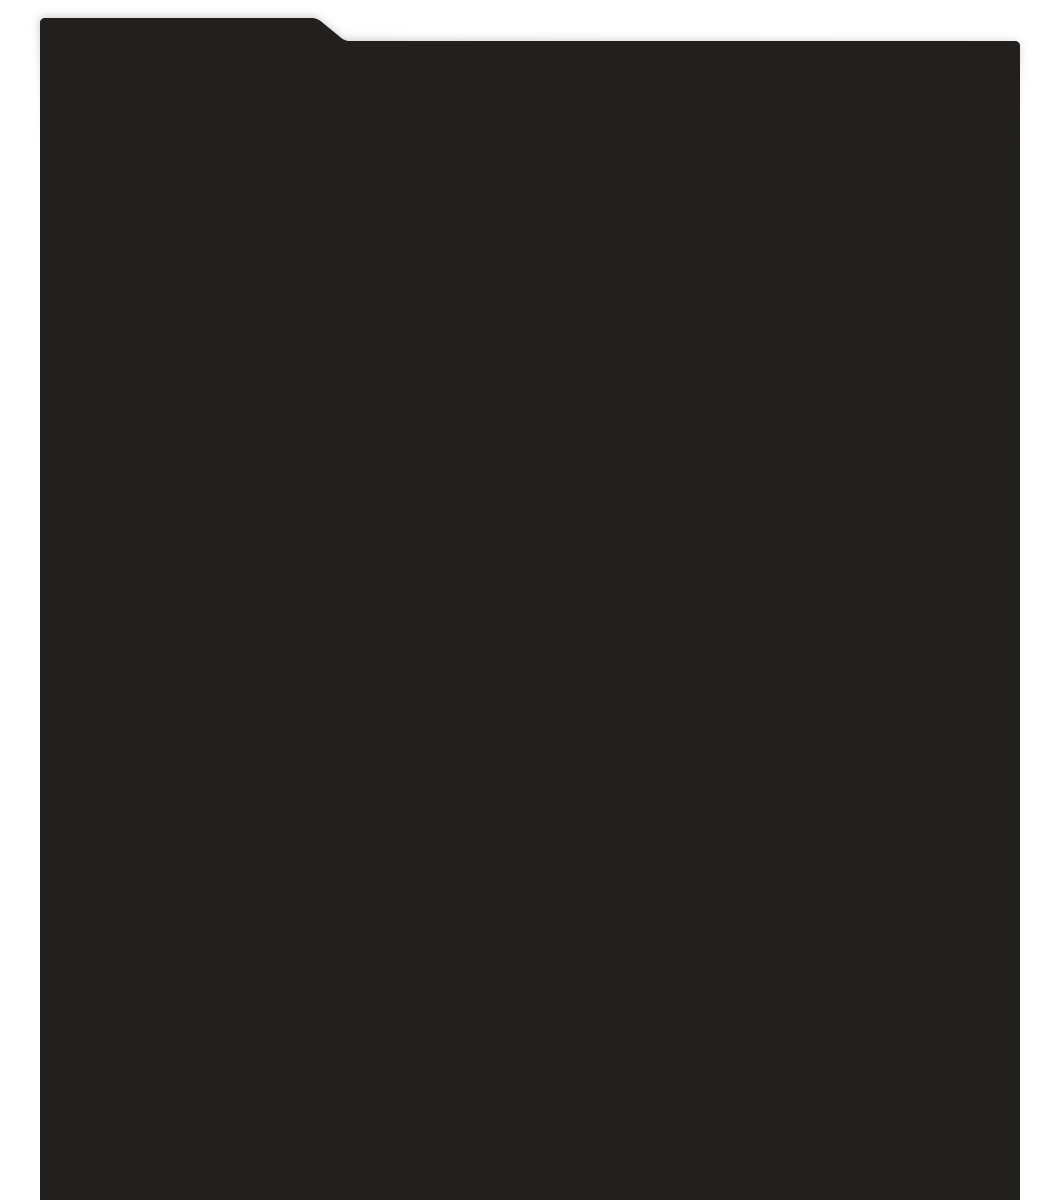
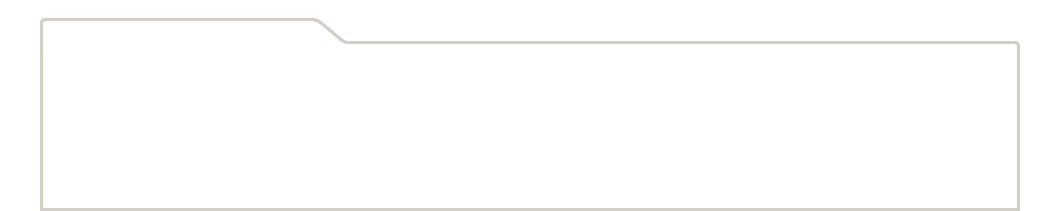
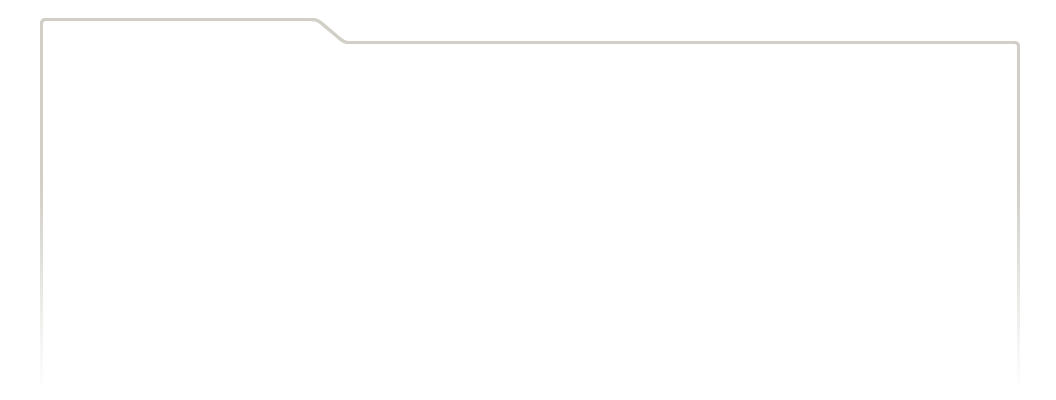
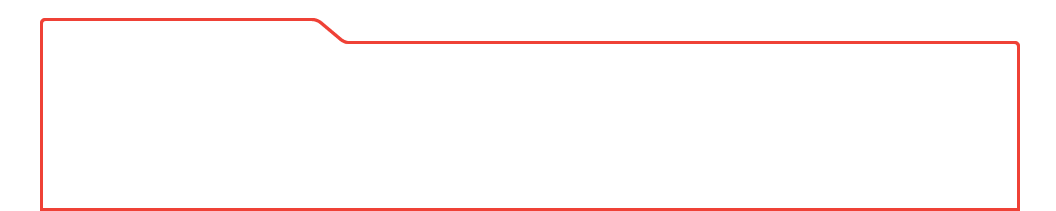
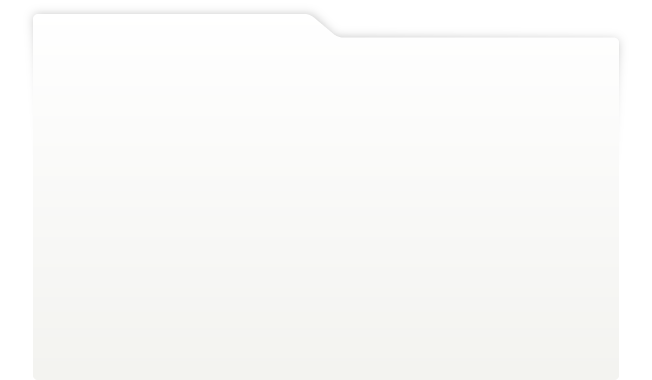
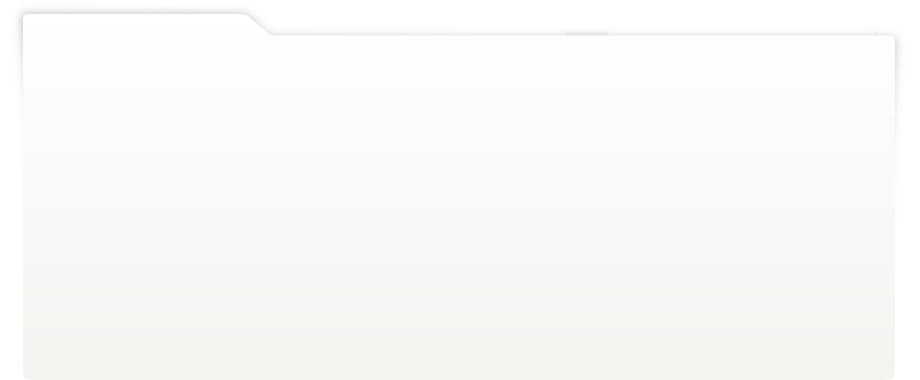
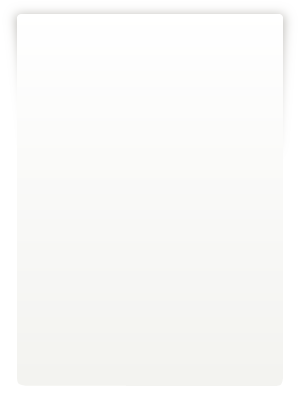
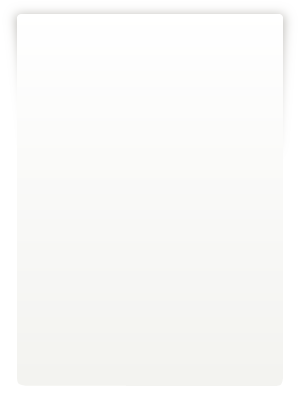
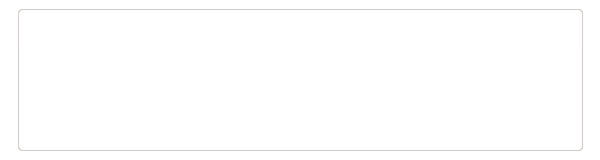
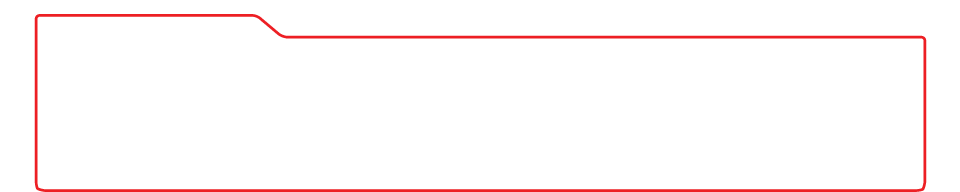
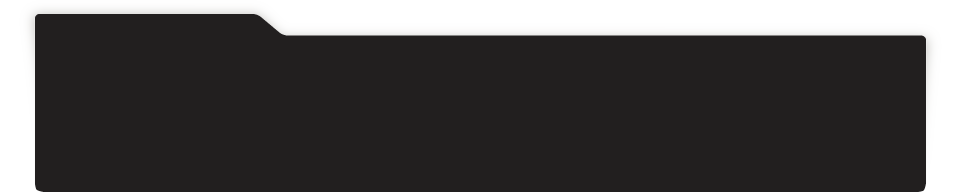
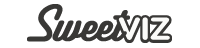
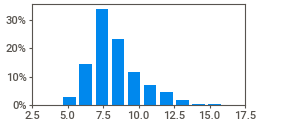
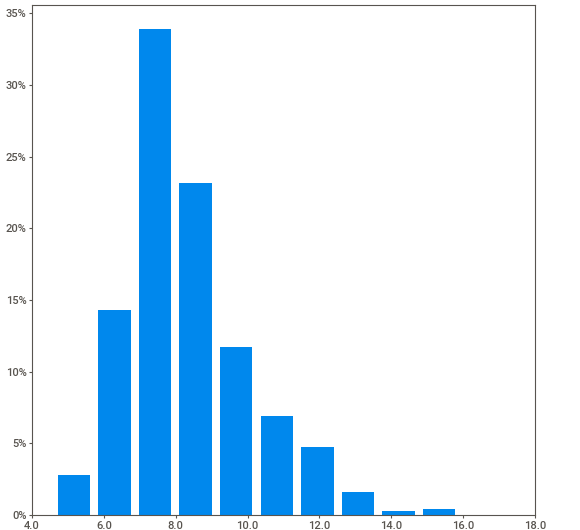
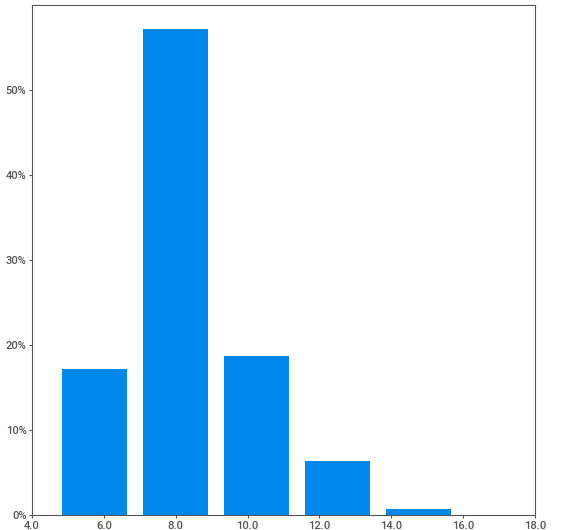
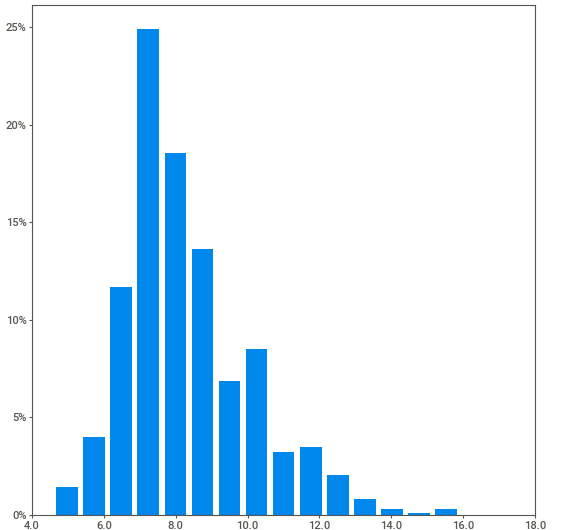
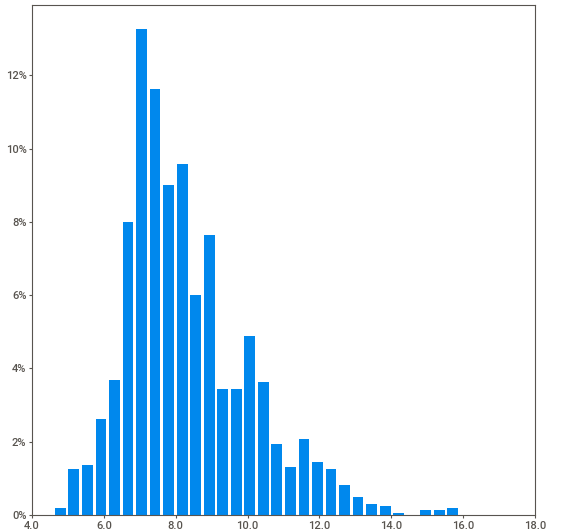
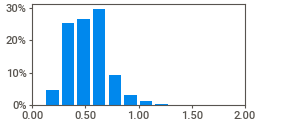
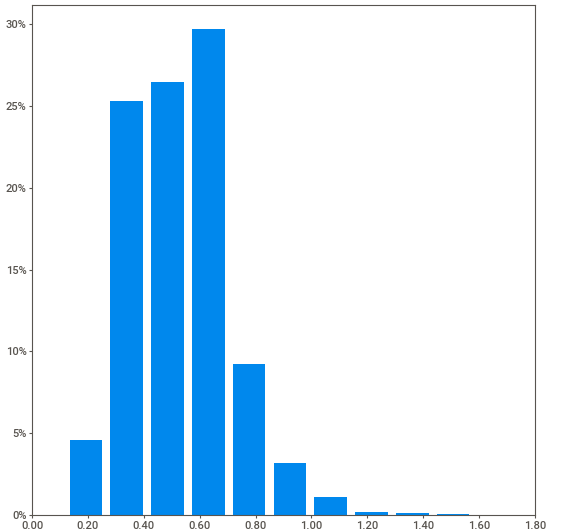
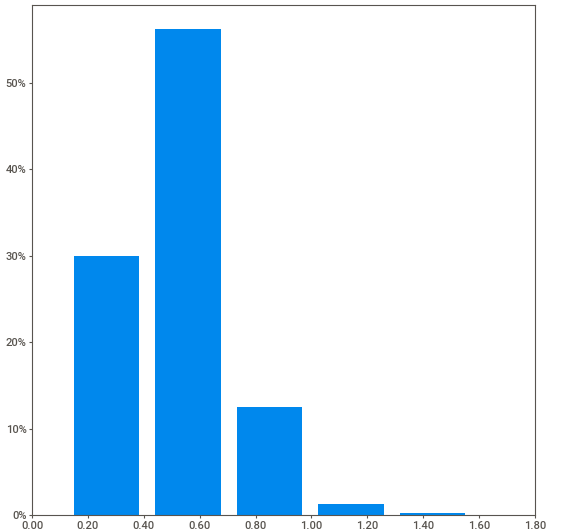
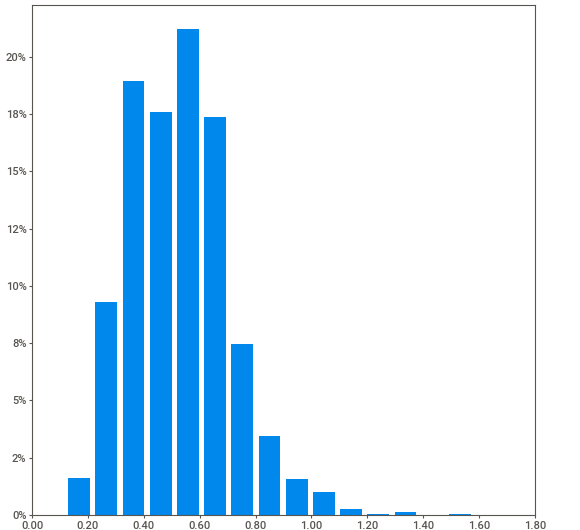
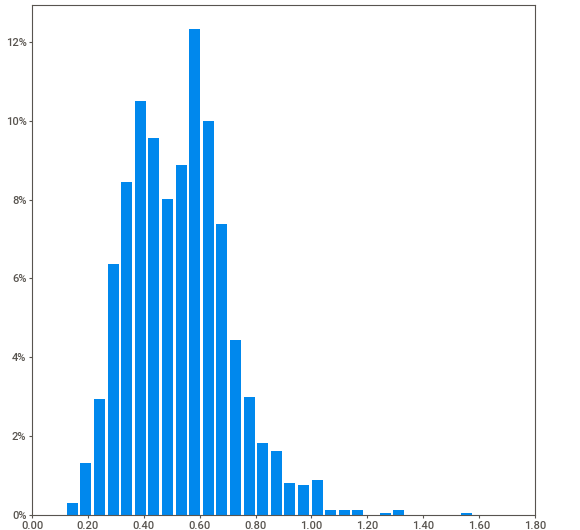
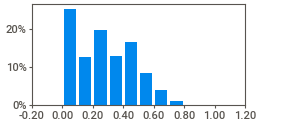
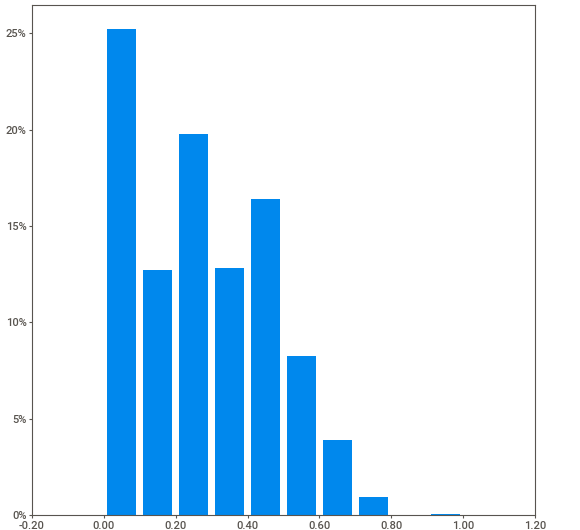
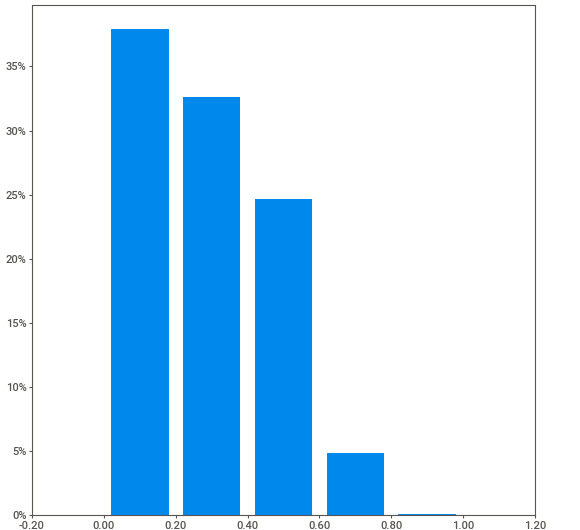
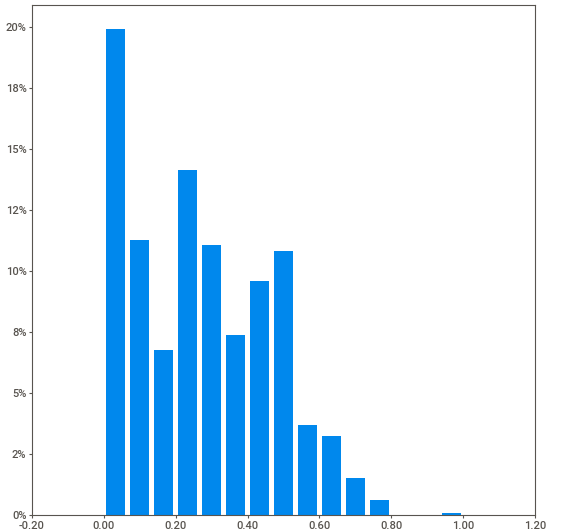
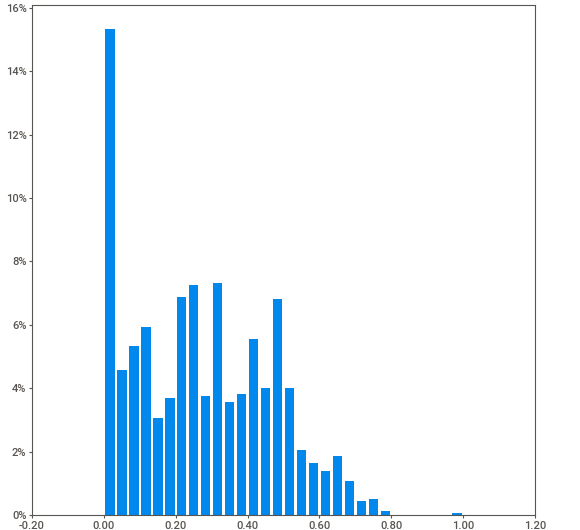
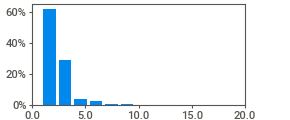
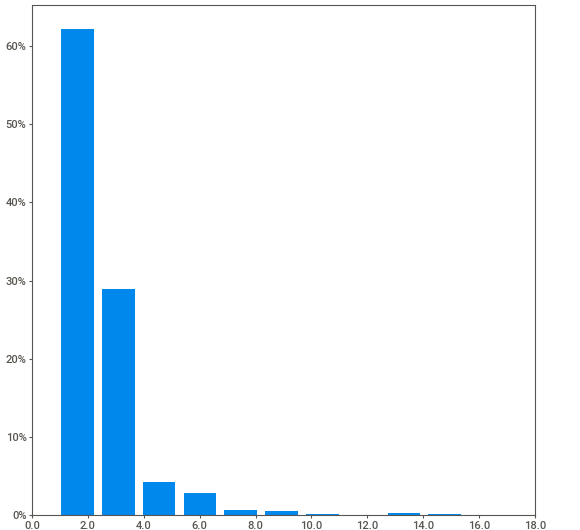
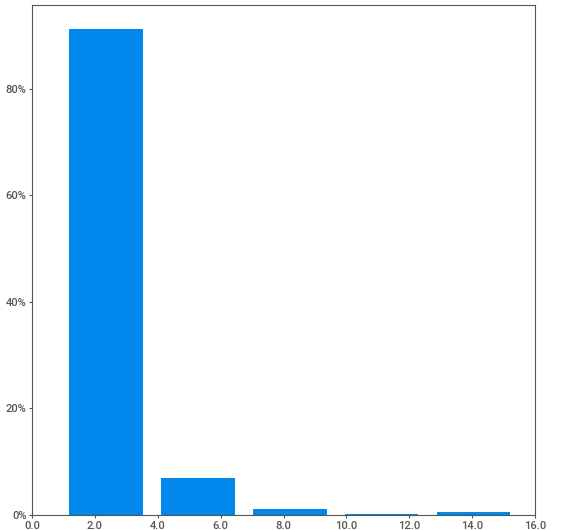
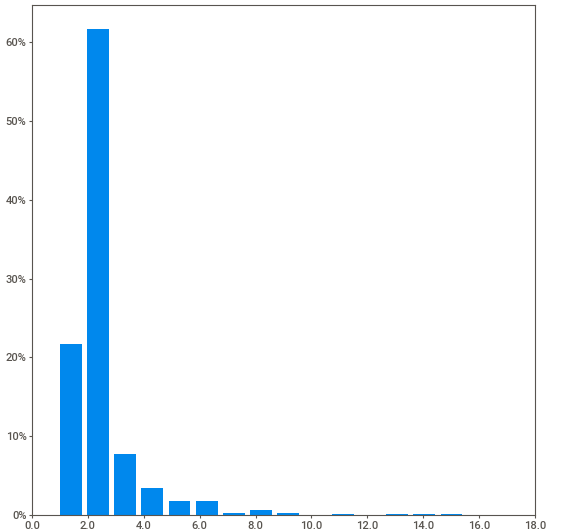
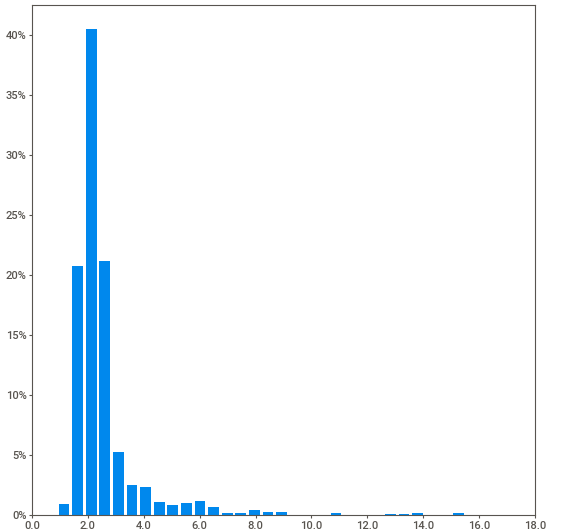
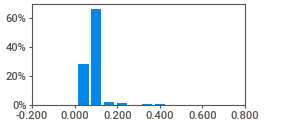
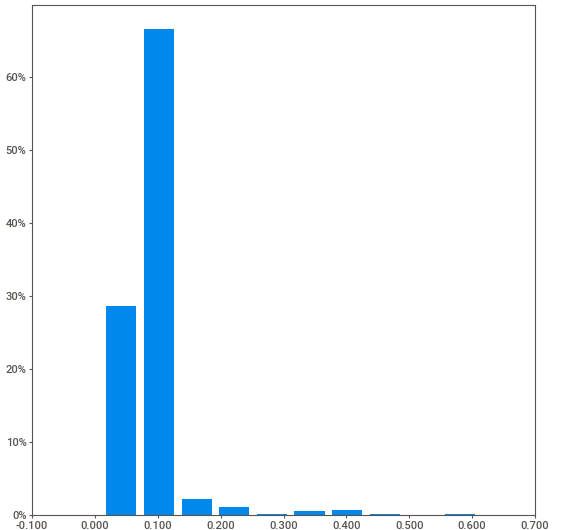
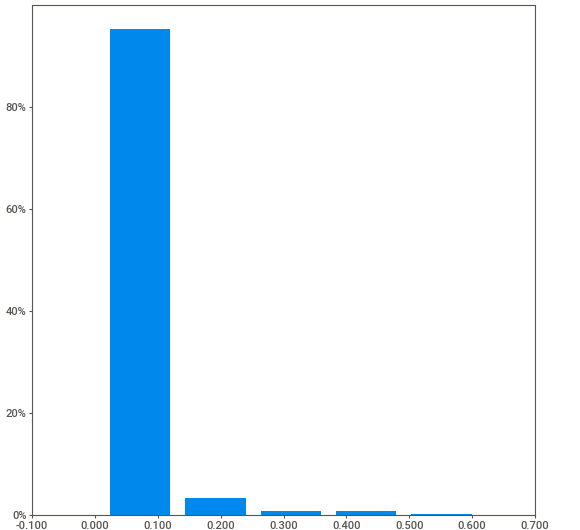
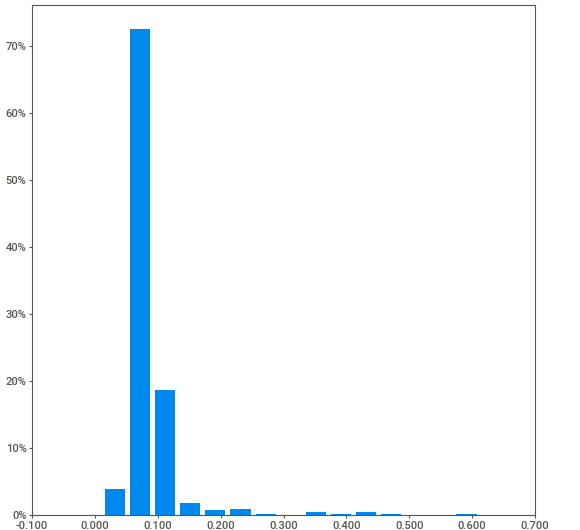
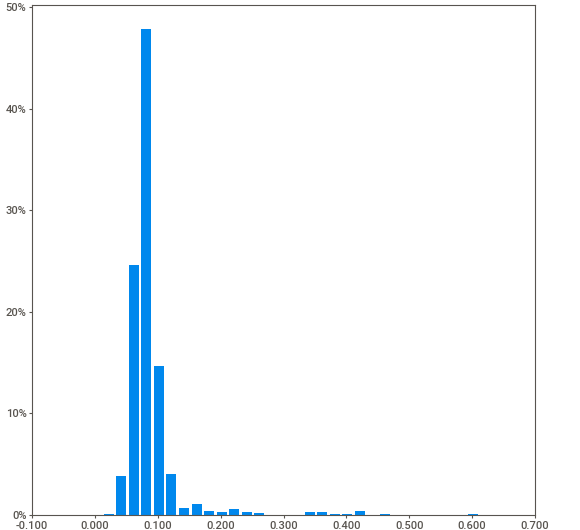
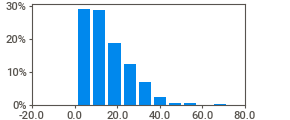
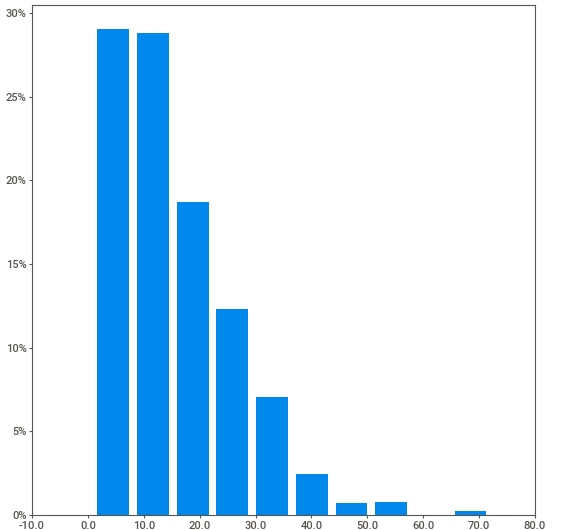
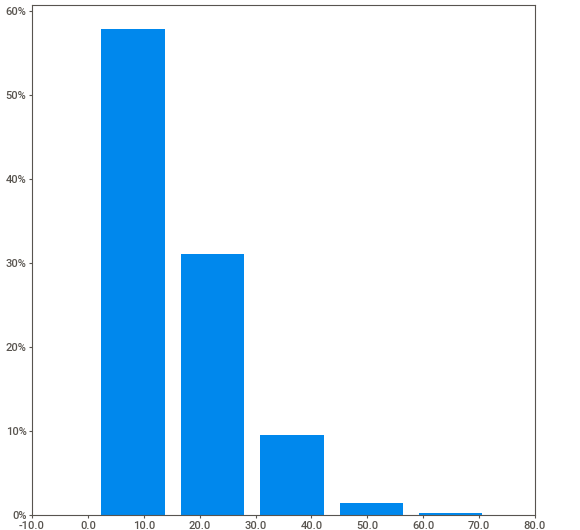
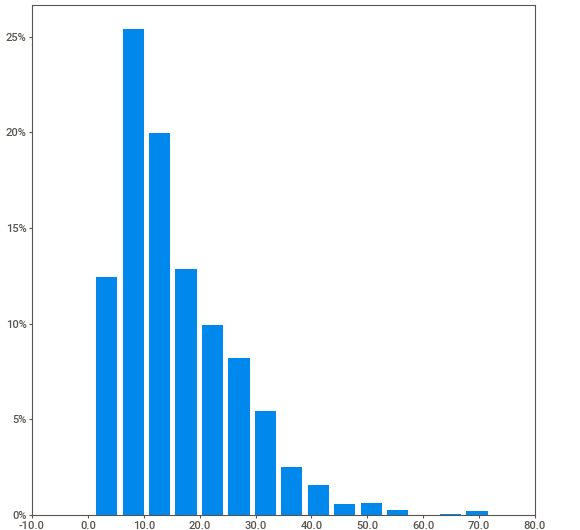
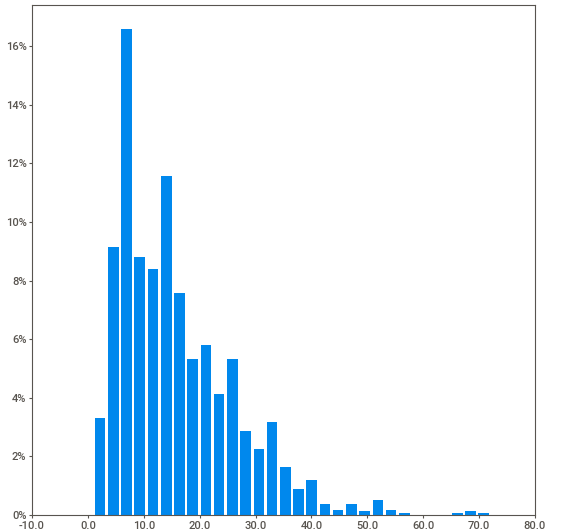
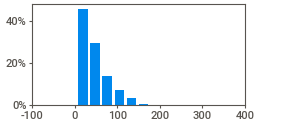
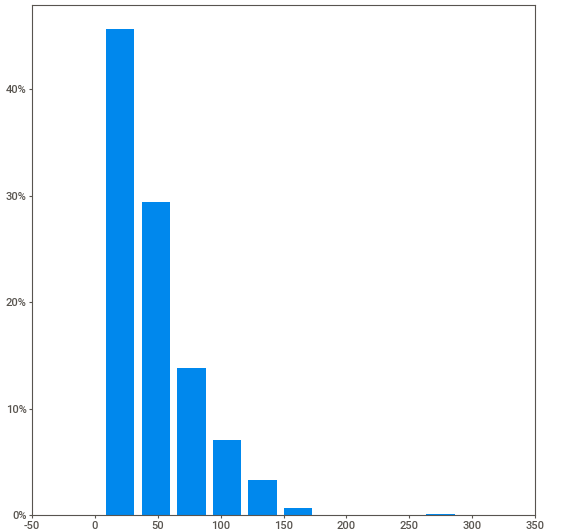
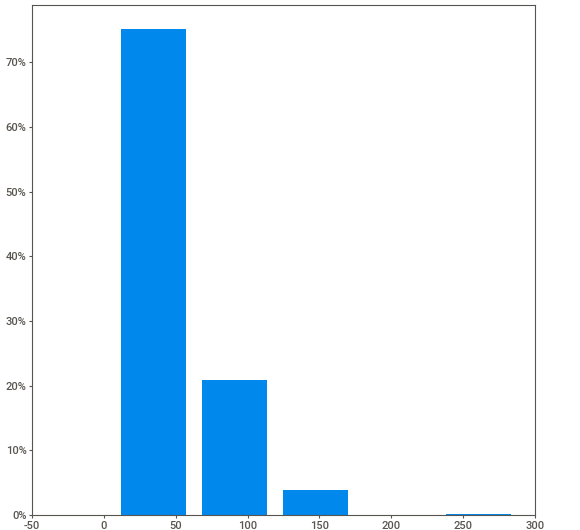
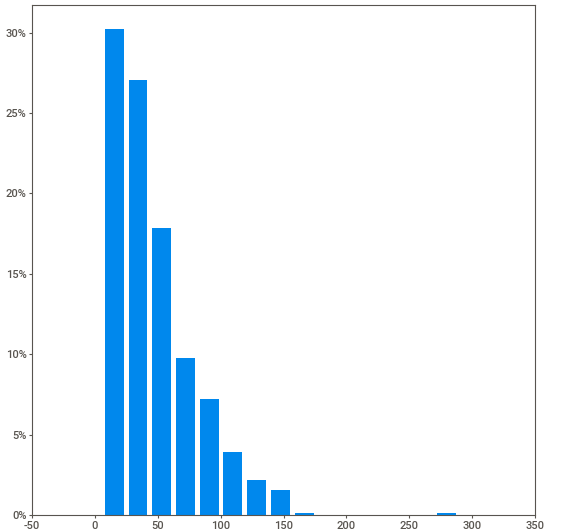
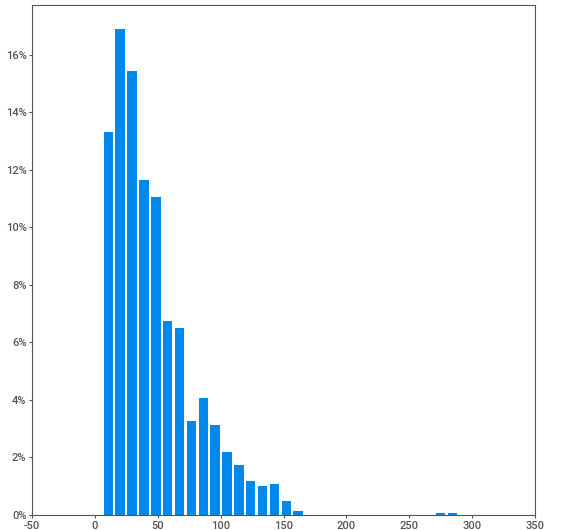
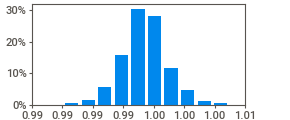
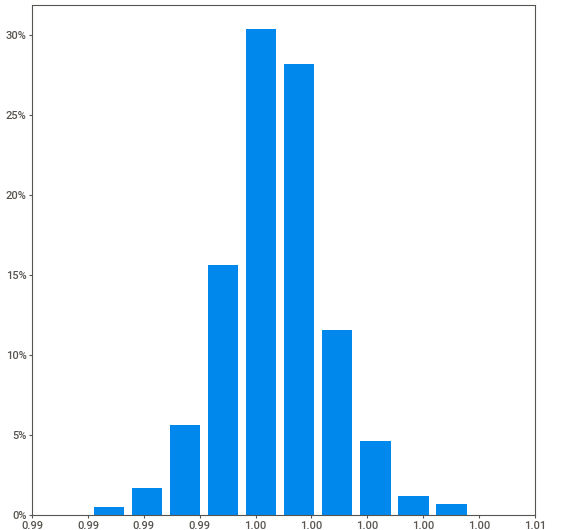
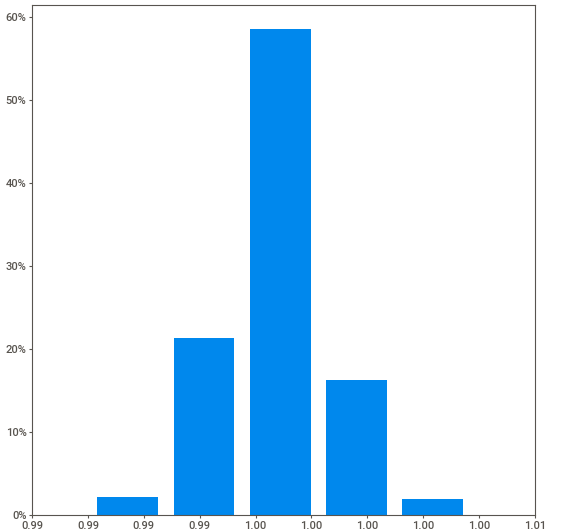
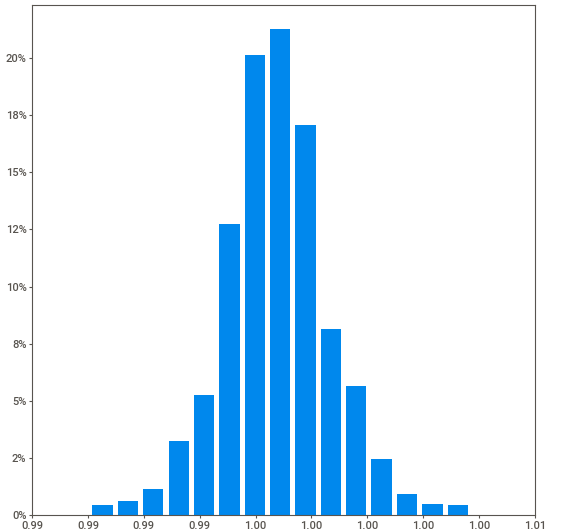
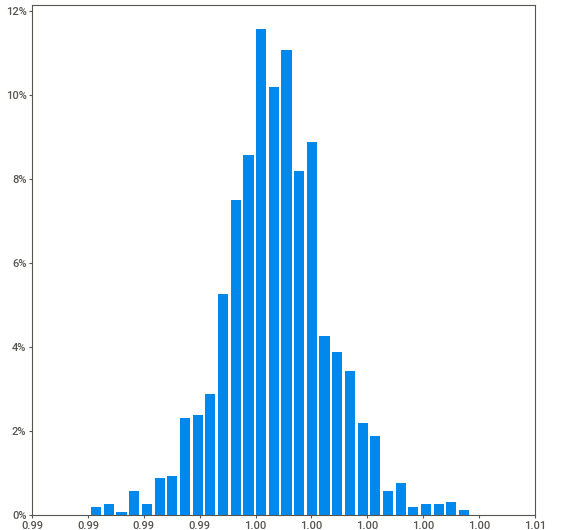
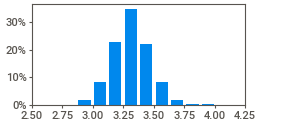
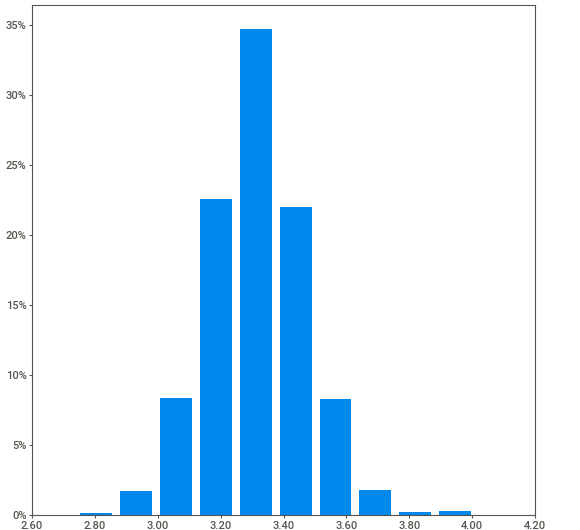
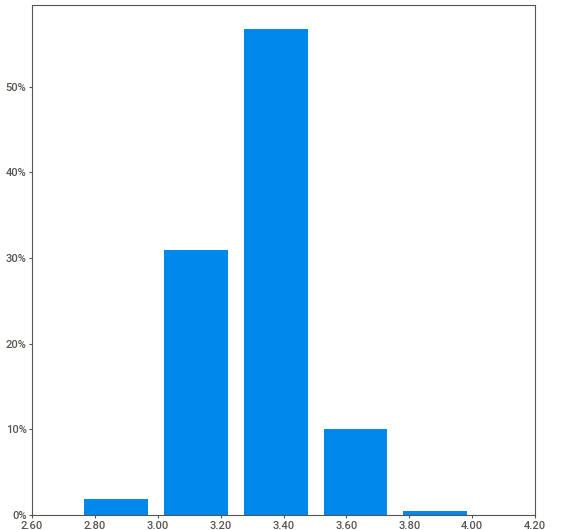
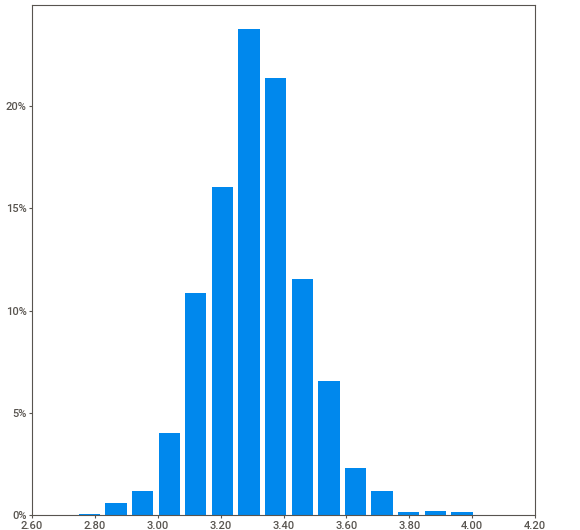
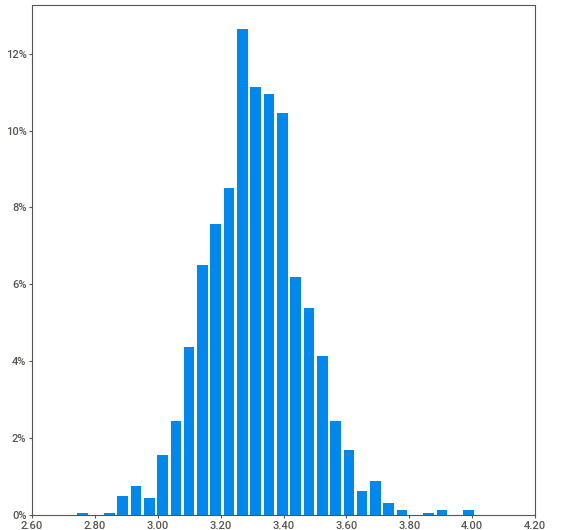
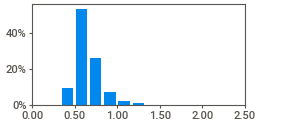
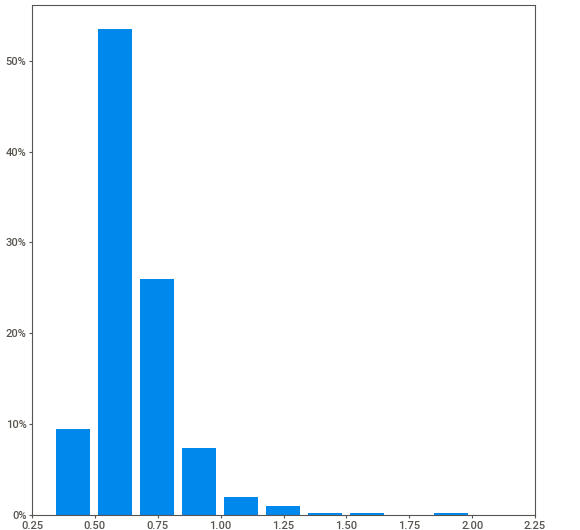
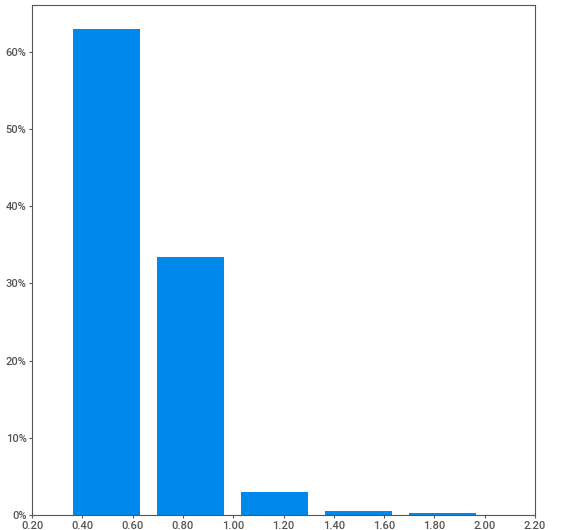
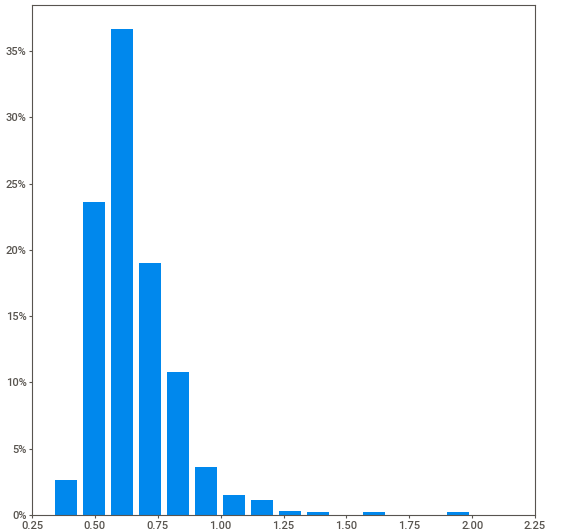
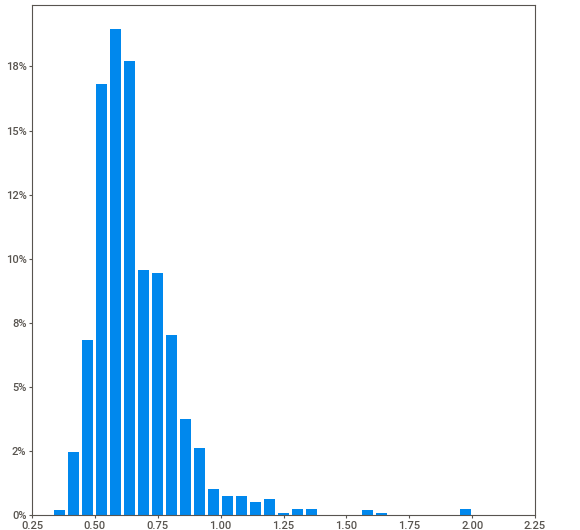
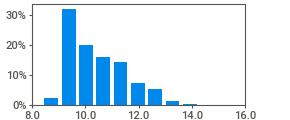
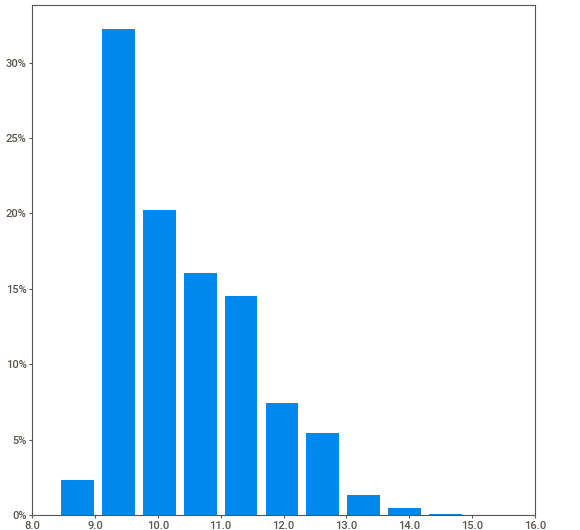
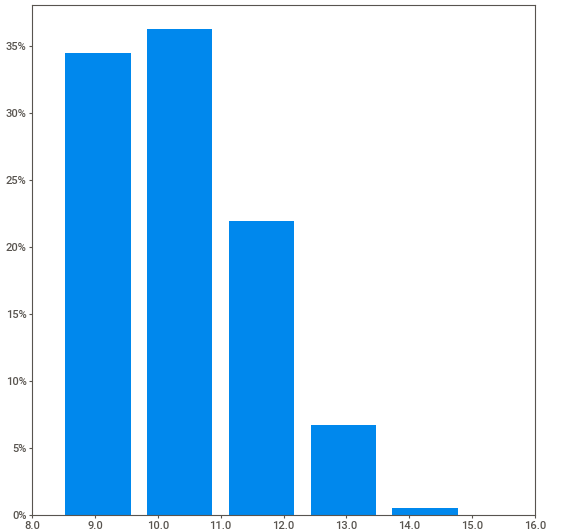
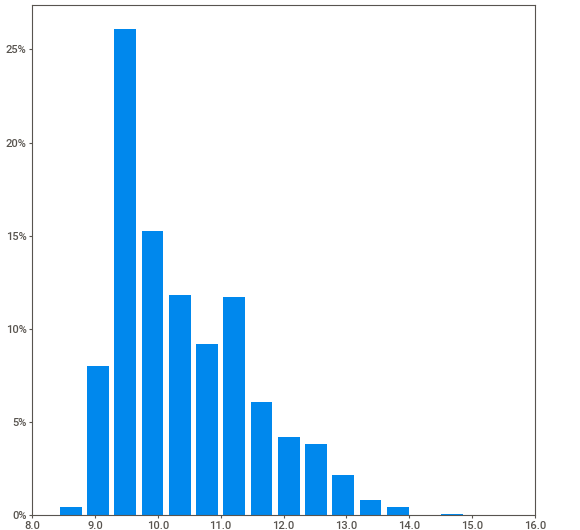
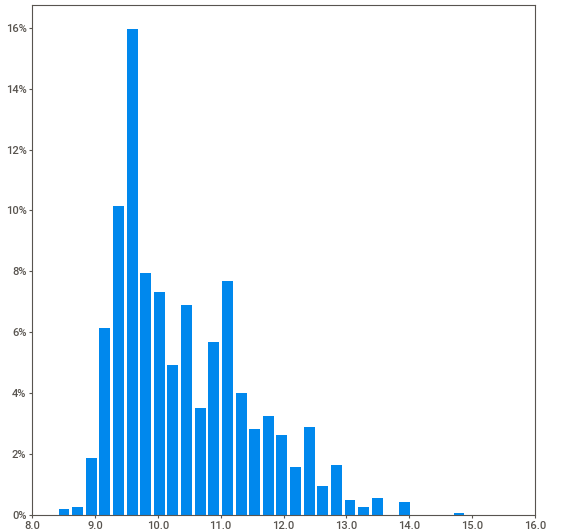
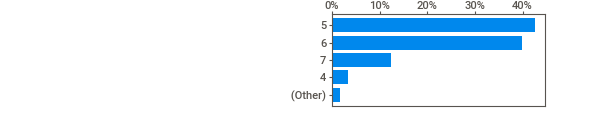
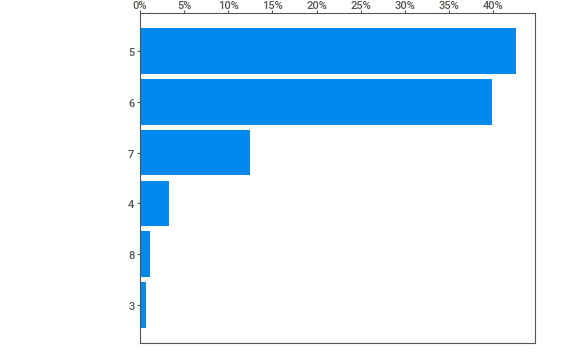
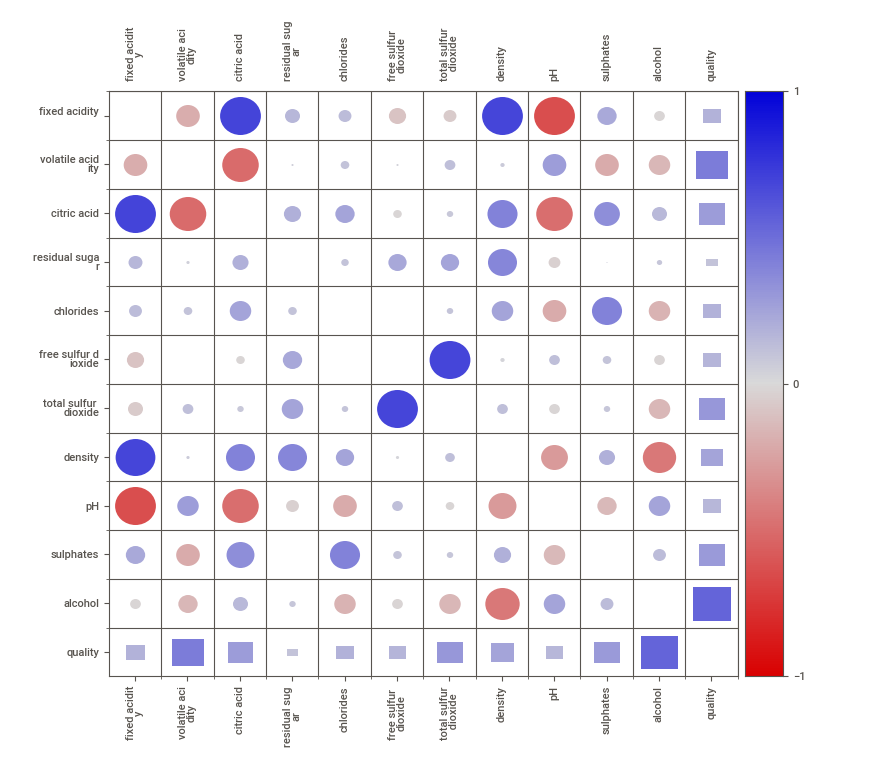
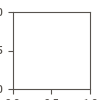

In [ ]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_notebook( 
            layout='widescreen', 
            scale=None) 

**Separação das features e da target.**

In [ ]:
X = df.drop(columns='quality')
y = df.quality

**Separação do conjunto treino e teste, conjunto teste será de 30%, o treino 70%.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.30)

**Treinamento de diversos modelos.**

In [ ]:
import autosklearn.regression
model =  autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=120,
    per_run_time_limit=59, resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 10})
model.fit(X_train, y_train,dataset_name='df')


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     per_run_time_limit=59, resampling_strategy='cv',
                     resampling_strategy_arguments={'folds': 10},
                     time_left_for_this_task=120)

**Teste do modelo.**

In [ ]:
print(model.leaderboard())
print(model.sprint_statistics())

          rank  ensemble_weight           type      cost  duration
model_id                                                          
2            1              1.0  random_forest  0.536767  51.64799
auto-sklearn results:
  Dataset name: df
  Metric: r2
  Best validation score: 0.463233
  Number of target algorithm runs: 3
  Number of successful target algorithm runs: 2
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0



**Aqui utilizei as métricas de R2 e a média de erro ao quadrado para que eu possa compreender melhor o meu modelo.**

In [ ]:
import sklearn.metrics

X_train_predictions = model.predict(X_train)
X_test_predictions = model.predict(X_test)


print("Train R2 score:", sklearn.metrics.r2_score(y_train, X_train_predictions))
print("Test R2 score:", sklearn.metrics.r2_score(y_test, X_test_predictions))

print('Mean squared error:',sklearn.metrics.mean_squared_error(y_test,X_test_predictions))

Train R2 score: 0.9039287112913583
Test R2 score: 0.47355448848664305
Mean squared error: 0.3366486520782137
